In [ ]:
!default-exp app

/bin/bash: line 1: default-exp: command not found


In [ ]:
!pip install -Uqq fastai gradio

from fastai.vision.all import load_learner
import gradio as gr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 596.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 41.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.7/318.7 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.6/94.6 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 56.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 6.1 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/Colab Notebooks/MasterCourse Data Science/P02_Food_Classifier/

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks/MasterCourse Data Science/P02_Food_Classifier


In [ ]:
cuisines = {
    'American burger': 'American burger',
    'American fried_chicken': 'American fried_chicken',
    'American hot_dog': 'American hot_dog',
    'Indian Fuchka': 'Indian Fuchka',
    'Indian biriyani': 'Indian biriyani',
    'Indian khichudi': 'Indian khichudi',
    'Indian khichuri': 'Indian khichuri',
    'Indian samosa': 'Indian samosa',
    'Italian lasagna': 'Italian lasagna',
    'Italian pizza': 'Italian pizza',
    'Italian speggeti': 'Italian speggeti',
    'Japanese okonomiyaki': 'Japanese okonomiyaki',
    'Japanese ramen': 'Japanese ramen',
    'Japanese sushi': 'Japanese sushi',
    'Mexican Chilaquiles': 'Mexican Chilaquiles',
    'Mexican nachos': 'Mexican nachos',
    'Mexican tacos': 'Mexican tacos',
    'Turkish baklava': 'Turkish baklava',
    'Turkish kebab': 'Turkish kebab',
    'Turkish meze_food': 'Turkish meze_food',
    'Turkish swarma': 'Turkish swarma'
}


In [ ]:
from fastai.vision.all import *
from PIL import Image, UnidentifiedImageError
import os

# Allowed image extensions
valid_extensions = {'.jpeg', '.jpg', '.png'}

data_path = Path("data")

# Define a function to get both the parent (cuisine) and the folder (dish)
def get_labels(file_path):
    # Get the parent folder (cuisine) and the dish folder
    cuisine = file_path.parent.parent.name  # The top-level folder (e.g., American)
    dish = file_path.parent.name            # The sub-folder (e.g., burger)
    return f"{cuisine} {dish}"              # Combine them for a multi-label classification

# Custom function to load and convert images to RGBA
def load_image_safe(fn):
    try:
        img = Image.open(fn)
        # If the image has a palette and transparency, convert it to RGBA
        if img.mode == "P":
            img = img.convert("RGBA")
        return PILImage.create(img)
    except UnidentifiedImageError:
        print(f"Skipping corrupt image: {fn}")
        return None  # Returning None means the image will be skipped

# Custom function to check if an image is valid and of a valid file type
def valid_image_filter(fn):
    # Check file extension
    if not fn.suffix.lower() in valid_extensions:
        print(f"Skipping invalid file type: {fn}")
        return False  # Skip the file if it's not a valid image extension

    # Check if the image can be loaded safely
    img = load_image_safe(fn)
    if img is None:
        return False  # Skip the file if it's invalid
    return True  # Keep valid images

# Function to replace the lambda
def get_valid_image(fn):
    return fn if valid_image_filter(fn) else None

# Load the DataLoaders
dls = torch.load("cousine_dataloader_v1.pkl")



<ipython-input-4-6f399c9697d4>:47: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  dls = torch.load("cousine_dataloader_v1.pkl")


In [ ]:
def rec_img(image):
    # Convert the image to RGB
    image = image.convert('RGB')

    pred, idx, probs = model.predict(image)
    #cuisine_keys = dls.vocab  # Use vocab for mapping
    food_probabilities = dict(zip(cuisines, map(float, probs)))  # Food item with probabilities

    # Map food items to cuisines and sum up the probabilities per cuisine
    cuisine_probs = {}
    for food, prob in food_probabilities.items():
        cuisine = cuisines[food]
        if cuisine in cuisine_probs:
            cuisine_probs[cuisine] += prob
        else:
            cuisine_probs[cuisine] = prob

    return cuisine_probs

In [ ]:
# #!export
model_path = "models"  # Path to the saved model

model = load_learner(f'models/models.pkl')




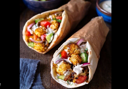

In [ ]:
from PIL import Image
img = Image.open(f'test_data/2.png')
img.thumbnail((128,128))
img

In [ ]:
rec_img(img)

{'American burger': 9.989832960854983e-07,
 'American fried_chicken': 1.079355843103258e-05,
 'American hot_dog': 0.00021261929941829294,
 'Indian Fuchka': 0.00019826633797492832,
 'Indian biriyani': 1.0945354915747885e-05,
 'Indian khichudi': 5.8966499636881053e-05,
 'Indian khichuri': 0.0004278515698388219,
 'Indian samosa': 0.01968046836555004,
 'Italian lasagna': 3.724894850165583e-05,
 'Italian pizza': 7.004242797847837e-05,
 'Italian speggeti': 9.142343515122775e-06,
 'Japanese okonomiyaki': 2.8594386094482616e-06,
 'Japanese ramen': 0.0003007531340699643,
 'Japanese sushi': 0.006793067324906588,
 'Mexican Chilaquiles': 2.106684223690536e-05,
 'Mexican nachos': 1.5372776260846877e-06,
 'Mexican tacos': 0.006283908616751432,
 'Turkish baklava': 0.00028213803307153285,
 'Turkish kebab': 0.0008110891794785857,
 'Turkish meze_food': 0.0018616573652252555,
 'Turkish swarma': 0.962924599647522}

In [ ]:
# !pip install gradio
import gradio as gr

# Define the image input and label output
image = gr.Image()
label = gr.Label(num_top_classes=3)

# Create the Gradio interface with specified settings
gr.Interface(
    fn=rec_img,       # Your prediction function
    inputs=image,     # Input type
    outputs=label,    # Output type
    live=True         # Set to True if you want to see real-time predictions
).launch(share=True, inline=False, debug=True)  # Enable sharing and set inline to False


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().

Could not create share link. Missing file: /usr/local/lib/python3.10/dist-packages/gradio/frpc_linux_amd64_v0.2. 

Please check your internet connection. This can happen if your antivirus software blocks the download of this file. You can install manually by following these steps: 

1. Download this file: https://cdn-media.huggingface.co/frpc-gradio-0.2/frpc_linux_amd64
2. Rename the downloaded file to: frpc_linux_amd64_v0.2
3. Move the file to this location: /usr/local/lib/python3.10/dist-packages/gradio
Keyboard interruption in main thread... closing server.
